In [1]:
import matplotlib.pyplot as plt
import numpy as np

## Sugar

In [2]:
def karplus_sugar(x,par="Condon"):
    R=np.pi/180 # conversion to radians, needed for some parametrizations
    
    if par=="Condon":
        # Parameters from Condon et al 2015 https://pubs.acs.org/doi/10.1021/ct501025q
        # Also used in Barnaba https://rnajournal.cshlp.org/content/25/2/219/T1.expansion.html
        # they are derived in Condon et al based on analysis of 2KOC
        return 9.67*np.cos(x)**2-2.03*np.cos(x)
    
    elif par=="Davies":
        # Copied from Condon et al 2015 https://pubs.acs.org/doi/10.1021/ct501025q
        # C++ code in SI: return(10.2∗pow(cos(X) ,2.0) 0.8∗cos(X));
        # it's identical to the one reported in Table S6 from Cesari et al JCTC 2016
        # https://pubs.acs.org/doi/suppl/10.1021/acs.jctc.6b00944/suppl_file/ct6b00944_si_001.pdf
        # Also Bottaro et al, NAR 2016 https://academic.oup.com/nar/article/44/12/5883/2457500?login=false
        # SI table 1.
        # attributed to Davies, D. B. Prog Nucl Magn Reson Spectrosc 1978, 12, 135–225.
        return 10.2*np.cos(x)**2-0.8*np.cos(x)
    
    elif par=="Haasnoot12":
        # Copied from Condon et al 2015 https://pubs.acs.org/doi/10.1021/ct501025q 
        # Eq. (12) in SI
        # specific for H1'-H2'
        return (
            2.33+13.24*np.cos(x)**2-0.91*np.cos(x)-2.41*np.cos(x+16*R)**2
            -1.74*np.cos(11*R-x)**2-3.32*np.cos(21*R-x)**2-3.13*np.cos(x+20*R)**2
        )
    
    elif par=="Haasnoot12-check":
        # Copied from Condon et al 2015 https://pubs.acs.org/doi/10.1021/ct501025q 
        # Eq. (11) in SI. Should be identical to Eq. (12)
        # indeed they are (confirmed)
        # specific for H1'-H2'
        return (
            13.24*np.cos(x)**2-0.91*np.cos(x)
            +(0.53-2.41*(np.cos(x+15.5*1.002*R))**2)*1.002
            +(0.53-2.41*(np.cos(-x+15.5*0.723*R))**2)*0.723
            +(0.53-2.41*(np.cos(-x+15.5*1.376*R))**2)*1.376
            +(0.53-2.41*(np.cos(x+15.5*1.3*R))**2)*1.3
        )
    
    elif par=="Haasnoot23":
        # Copied from Condon et al 2015 https://pubs.acs.org/doi/10.1021/ct501025q 
        # Eq. (15) in SI
        # specific for H2'-H3'
        return (
             2.18+13.24*np.cos(x)**2-0.91*np.cos(x)-1.95*np.cos(x+13*R)**2
             -1.74*np.cos(11*R-x)**2-3.13*np.cos(20*R-x)**2-3.11*np.cos(x+20*R)**2
        )
    elif par=="Haasnoot34":
        # Copied from Condon et al 2015 https://pubs.acs.org/doi/10.1021/ct501025q 
        # Eq. (18) in SI
        # specific for H3'-H4'
        return (
             2.14+13.24*np.cos(x)**2-0.91*np.cos(x)-1.74*np.cos(x+11*R)**2
         -1.56*np.cos(10*R-x)**2-3.11*np.cos(20*R-x)**2-3.31*np.cos(x+21*R)**2
        )
    elif par=="HaasnootB12":
        # Table S6 from Cesari et al JCTC 2016
        # do not match with Condon! might be incorrect
        return (
             1.270+6.965*np.cos(x)**2-0.91*np.cos(x)+1.026*np.sin(x)*np.cos(x)
        )
    elif par=="HaasnootB23":
        # Table S6 from Cesari et al JCTC 2016
        # do not match with Condon! might be incorrect
        return (
             0.002+8.289*np.cos(x)**2-0.91*np.cos(x)+0.668*np.sin(x)*np.cos(x)
        )
    elif par=="HaasnootB34":
        # Table S6 from Cesari et al JCTC 2016
        # do not match with Condon! might be incorrect
        return (
             -0.262+7.964*np.cos(x)**2-0.91*np.cos(x)+0.772*np.sin(x)*np.cos(x)
        )


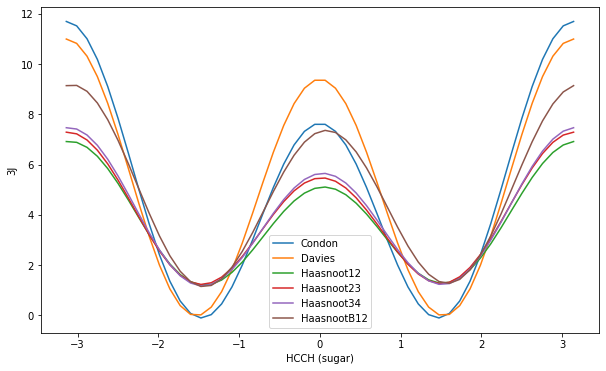

In [3]:
plt.figure(figsize=(10,6))
for l in [
    "Condon",
    "Davies",
    "Haasnoot12",
    "Haasnoot23",
    "Haasnoot34",
    "HaasnootB12",
#    "Haasnoot12-check",
#    "HaasnootB23",
#    "HaasnootB34"
]:
    x=np.linspace(-np.pi,np.pi)
    plt.plot(x,karplus_sugar(x,par=l),label=l)
plt.legend()
plt.xlabel("HCCH (sugar)")
plt.ylabel("3J")
plt.show()

In [4]:
def karplus_backbone(x,par):
    R=np.pi/180 # conversion to radians, needed for some parametrizations
    
    if par=="Lankhorst-beta-hp" or "Lankhorst-epsilon-hp":
        # Parameters from Lankhorst (1984)
        # https://www.tandfonline.com/doi/abs/10.1080/07391102.1984.10507527
        # Eq in the abstract of the paper
        # Also used in Barnaba https://rnajournal.cshlp.org/content/25/2/219/T1.expansion.html
        return 15.3*np.cos(x)**2-6.1*np.cos(x)+1.6
    
    elif par=="Mooren-beta-hp" or par=="Mooren-epsilon-hp":
        # Parameters from Mooren (1994)
        # https://www.ncbi.nlm.nih.gov/pmc/articles/PMC308224/pdf/nar00037-0233.pdf
        # Eq. (4)
        return 15.3*np.cos(x)**2-6.2*np.cos(x)+1.5
    
    elif par=="Lee-beta-hp" or par=="Lee-epsilon-hp":
        # Parameters from Lee (1976)
        # https://pubs.acs.org/doi/pdf/10.1021/ja00428a026
        # Eq. (3)
        return 18.1*np.cos(x)**2-4.8*np.cos(x)
    
    elif par=="Lankhorst-beta-cp" or par=="Lankhorst-epsilon-cp":
        # Parameters from Lankhorst (1984)
        # https://www.tandfonline.com/doi/abs/10.1080/07391102.1984.10507527
        # Eq in the abstract of the paper
        # Also used in Barnaba https://rnajournal.cshlp.org/content/25/2/219/T1.expansion.html
        # Note: in barnaba they are mentioned as Marino et al, which is a review
        return 6.9*np.cos(x)**2 - 3.4*np.cos(x) + 0.7
    
    elif par=="Mooren-beta-cp" or par=="Mooren-epsilon-cp":
        # Parameters from Mooren (1994)
        # https://www.ncbi.nlm.nih.gov/pmc/articles/PMC308224/pdf/nar00037-0233.pdf
        # Eq. (3)
        # In Cesari et al 2016 they are mentioned as from this paper, which is a review:
        # Wijmenga, S. S.; van Buuren, B. N. Prog Nucl Magn Reson Spectrosc 1998, 32, 287–387.
        return 8.0*np.cos(x)**2-3.4*np.cos(x)+0.5
    
    elif par=="Davies-gamma":
        # Parameters from Davies, D. B. Prog Nucl Magn Reson Spectrosc 1978, 12, 135–225.
        # Notice that Davies attributes them to a previous work (a book?)
        # Default in Barnaba, there mentioned as Davies
        # Cited in Condon et al 2015 with a wrong sign (1.8)
        return 9.7*np.cos(x)**2-1.8*np.cos(x)
    
    elif par=="Haasnoot-gamma1": #H4'H5'
        # Copied from Condon et al 2015 https://pubs.acs.org/doi/10.1021/ct501025q 
        # Eq. (23) in SI
        # specific for H4'-H5'
        return (
            2.61+13.22*np.cos(x)**2-0.99*np.cos(x)-0.984*np.cos(x+8*R)**2
            -3.2*np.cos(26*R-x)**2-3.2*np.cos(26*R+x)**2
        )
    
    elif par=="Haasnoot-gamma2": #H4'H5''
        # Copied from Condon et al 2015 https://pubs.acs.org/doi/10.1021/ct501025q 
        # Eq. (26) in SI
        # specific for H4'-H5''
        return (
            2.61+13.22*np.cos(x)**2-0.99*np.cos(x)-0.984*np.cos(x+8*R)**2
            -6.4*np.cos(26*R-x)**2
        )
    
    elif par=="Condon27-gamma1":
        # just Eq. 27a from Condon, as a test
        return (
            5.26+0.65*np.cos(x+120*R)-0.92*np.sin(x+120*R)
            -1.89*np.cos(2*(x+120*R))-3.56*np.sin(2*(x+120*R))
        )
    
    elif par=="Condon27-gamma2":
        # just Eq. 27b from Condon, as a test
        return (
            5.41-0.99*np.cos(x)+0.04*np.sin(x)
            +3.79*np.cos(2*x)-2.27*np.sin(2*x)
        )
    
    elif par=="HaasnootB-gamma1": #H4'H5'
        # Parameters taken from Cesari et al 2016, attributed to this paper:
        # Haasnoot, C.; de Leeuw, F.; Altona, C. Tetrahedron 1980, 36, 2783–2792.
        # I didn't check the original paper
        # numerically identical (and simpler expression) to Condon 2015
        return 8.313*np.cos(x)**2-0.99*np.cos(x)+0.27*np.sin(x)*np.cos(x)+1.373

    elif par=="HaasnootB-gamma2": #H4'H5''
        # Parameters taken from Cesari et al 2016, attributed to this paper:
        # Haasnoot, C.; de Leeuw, F.; Altona, C. Tetrahedron 1980, 36, 2783–2792.
        # I didn't check the original paper
        # numerically identical (and simpler expression) to Condon 2015
        return 8.313*np.cos(x)**2-0.99*np.cos(x)-4.752*np.sin(x)*np.cos(x)+1.373
    
    assert False

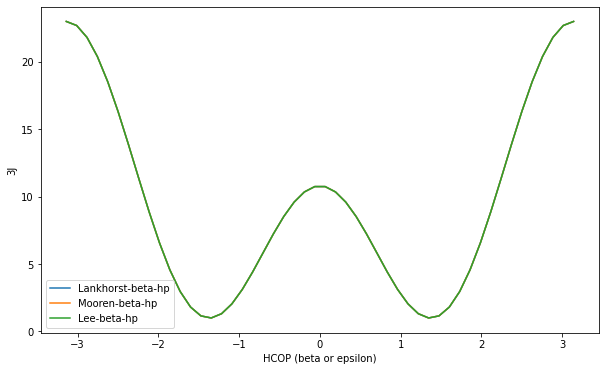

In [5]:
plt.figure(figsize=(10,6))
for l in [
    "Lankhorst-beta-hp",
    "Mooren-beta-hp",
    "Lee-beta-hp",
]:
    x=np.linspace(-np.pi,np.pi)
    plt.plot(x,karplus_backbone(x,par=l),label=l)
plt.legend()
plt.xlabel("HCOP (beta or epsilon)")
plt.ylabel("3J")
plt.show()

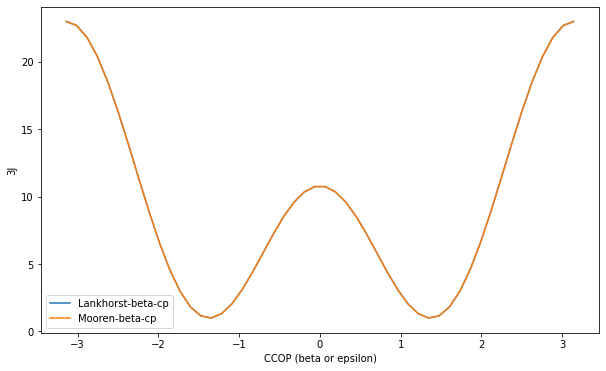

In [6]:
plt.figure(figsize=(10,6))
for l in [
    "Lankhorst-beta-cp",
    "Mooren-beta-cp"
]:
    x=np.linspace(-np.pi,np.pi)
    plt.plot(x,karplus_backbone(x,par=l),label=l)
plt.legend()
plt.xlabel("CCOP (beta or epsilon)")
plt.ylabel("3J")
plt.show()

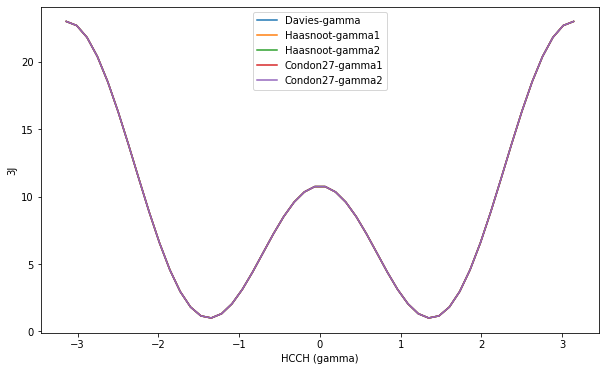

In [7]:
plt.figure(figsize=(10,6))
for l in [
    "Davies-gamma",
    "Haasnoot-gamma1",
    "Haasnoot-gamma2",
#    "HaasnootB-gamma1", # identical to Haasnoot-gamma1
#    "HaasnootB-gamma2"  # identical to Haasnoot-gamma2
    "Condon27-gamma1",
    "Condon27-gamma2",
]:
    x=np.linspace(-np.pi,np.pi)
    plt.plot(x,karplus_backbone(x,par=l),label=l)
plt.legend()
plt.xlabel("HCCH (gamma)")
plt.ylabel("3J")
plt.show()